## Perceptron task description

 "A perceptron can be used when the data is linearly separable"
 
![Perceptron](percept.jpg)
 
#### Code must include:

- A set of points on a 2D plane [(x1,y1), (x2,y2, ..., (xn,yn)]
- The data separated into two categories by a line (i.e. y=2x)
- Plot the data and the line
- Create a perceptron function that takes the data as argument and based on the learning process finds the optimal weights that create the best line to separate the data.
- Plot the data and the expected line and the line obtained by the perceptron in every certain amount of iterations.
- Discuss: What is the optimal number of iterations? How many solutions can the perceptron find for this binary separation problem?

### Libraries

In [1]:
from matplotlib import pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

### Datapoints

Some linearly separable data, randomly generated:

In [2]:
n = 30        # any arbitrary number of datapoints

x1 = np.random.uniform(0,1,n)
x2 = np.random.uniform(0,1,n)

matrix = np.empty((n,4))

for i in range(n):
    matrix[i][0] = 1
    matrix[i][1] = x1[i]
    matrix[i][2] = x2[i]
    
    if x1[i] + x2[i] >= 1 :        # this condiction allows for linearly separable datasets
        matrix[i][3] = 1.0
    else :
        matrix[i][3] = 0.0
    
matrix

array([[1.  , 0.49, 0.68, 1.  ],
       [1.  , 0.61, 0.31, 0.  ],
       [1.  , 0.48, 0.48, 0.  ],
       [1.  , 0.15, 0.41, 0.  ],
       [1.  , 0.6 , 0.68, 1.  ],
       [1.  , 0.54, 0.6 , 1.  ],
       [1.  , 0.62, 0.29, 0.  ],
       [1.  , 0.25, 0.2 , 0.  ],
       [1.  , 0.69, 0.06, 0.  ],
       [1.  , 0.72, 0.67, 1.  ],
       [1.  , 0.51, 0.52, 1.  ],
       [1.  , 0.11, 0.6 , 0.  ],
       [1.  , 0.97, 0.48, 1.  ],
       [1.  , 0.43, 0.77, 1.  ],
       [1.  , 0.67, 0.17, 0.  ],
       [1.  , 0.93, 0.38, 1.  ],
       [1.  , 0.4 , 0.95, 1.  ],
       [1.  , 0.73, 0.9 , 1.  ],
       [1.  , 0.74, 0.33, 1.  ],
       [1.  , 0.85, 0.82, 1.  ],
       [1.  , 0.01, 0.9 , 0.  ],
       [1.  , 0.62, 0.41, 1.  ],
       [1.  , 1.  , 0.13, 1.  ],
       [1.  , 0.38, 0.67, 1.  ],
       [1.  , 0.44, 0.88, 1.  ],
       [1.  , 0.45, 0.35, 0.  ],
       [1.  , 0.49, 0.7 , 1.  ],
       [1.  , 0.14, 0.54, 0.  ],
       [1.  , 0.34, 0.51, 0.  ],
       [1.  , 0.2 , 0.58, 0.  ]])

### Verify datapoint distribution is linearly separable

The condition can be verified by plotting the generated datapoints

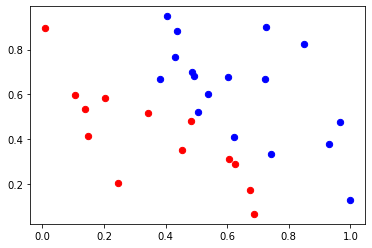

In [3]:
c1_data=[[],[]]
c0_data=[[],[]]

for i in range(len(matrix)):
    x1 = matrix[i][1]
    x2 = matrix[i][2]
    y  = matrix[i][-1]
    if y==1:
        c1_data[0].append(x1)
        c1_data[1].append(x2)
    else:
        c0_data[0].append(x1)
        c0_data[1].append(x2)

c0s = plt.scatter(c0_data[0],c0_data[1],s=40.0,c='r')
c1s = plt.scatter(c1_data[0],c1_data[1],s=40.0,c='b')

plt.show()

### Activation function

In [4]:
'''This takes the place of an activation function if value is over 0 points are one class and if equals or under 0 
another class. Note to self: += adds another value with the variable's value and assigns the new value to the variable.
Note to self: The zip() function returns a zip object, which is an iterator of tuples where the first item in 
each passed iterator is paired together, and then the second item in each passed iterator are paired together etc. 
Here it is used for the inner product of two vectors.'''

def activate(inputs, weights):
    activation=0.0
    for i,w in zip(inputs,weights):
        activation += i*w 
    return 1.0 if activation>=0.0 else 0.0

### Accuracy function (how close are we?)

In [5]:
def accuracy(matrix,weights):
    num_correct = 0.0
    predictions       = []
    for i in range(len(matrix)):
        classif   = activate(matrix[i][:-1],weights) # get predicted classification
        predictions.append(classif)
        if classif==matrix[i][-1]: num_correct+=1.0 
    #print("Predictions:",predictions)
    return num_correct/float(len(matrix))

### Plotting function

In [6]:
def plot(matrix, title):

    fig,ax = plt.subplots()
    ax.set_title(title)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")

    axis_min=0.0
    axis_max=1.1
    y_res=0.001
    x_res=0.001
    ys=np.arange(axis_min,axis_max,y_res)
    xs=np.arange(axis_min,axis_max,x_res)
    zs=[]
    for cur_y in np.arange(axis_min,axis_max,y_res):
        for cur_x in np.arange(axis_min,axis_max,x_res):
            zs.append(activate([1.0,cur_x,cur_y],weights))
    xs,ys=np.meshgrid(xs,ys)
    zs=np.array(zs)
    zs = zs.reshape(xs.shape)
    cp=plt.contourf(xs,ys,zs,levels=[-1,-0.0001,0,1],colors=('b','r'),alpha=0.1)

    c1_data=[[],[]]
    c0_data=[[],[]]
    for i in range(len(matrix)):
        cur_x1 = matrix[i][1]
        cur_x2 = matrix[i][2]
        cur_y  = matrix[i][-1]
        if cur_y==1:
            c1_data[0].append(cur_x1)
            c1_data[1].append(cur_x2)
        else:
            c0_data[0].append(cur_x1)
            c0_data[1].append(cur_x2)

    plt.xticks(np.arange(0.0,1.1,0.1))
    plt.yticks(np.arange(0.0,1.1,0.1))
    plt.xlim(0,1.05)
    plt.ylim(0,1.05)

    c0s = plt.scatter(c0_data[0],c0_data[1],s=40.0,c='r',label='Class -1')
    c1s = plt.scatter(c1_data[0],c1_data[1],s=40.0,c='b',label='Class 1')

    plt.show()

### Setting up parameters

In [7]:
rate = 1.0                  # an optimized learning rate provided by the author of the original code
plotting = True             #set to true to plot every iteration, false to plot only the final correct line
weights = [  0.20,  1.00,  -1.00        ] # initial weights, provided by the author of the original code

### Training and best fit function

In [8]:
def perceptron(matrix, weights = weights, rate = rate, plotting = plotting):   
    iteration = 0
    cur_acc = accuracy(matrix, weights)
    while cur_acc < 1.0:
        cur_acc = accuracy(matrix, weights)
        print("\n Iteration %d \nWeights: "%iteration, weights)
        print("Accuracy: ", cur_acc)

        if cur_acc==1.0: break 

        if plotting: plot(matrix, title="Iteration %d"%iteration)

        for i in range(len(matrix)):
            prediction = activate(matrix[i][:-1],weights) # get predicted classificaion
            error      = matrix[i][-1]-prediction         # get error from real classification
            for j in range(len(weights)):                 # calculate new weight for each node
                weights[j] = weights[j]+(rate*error*matrix[i][j]) 
        
        iteration = iteration + 1     
        
    plot(matrix, title="Final iteration")
    print(weights)


### Test

We proceed to test the perceptron function


 Iteration 0 
Weights:  [0.2, 1.0, -1.0]
Accuracy:  0.5666666666666667


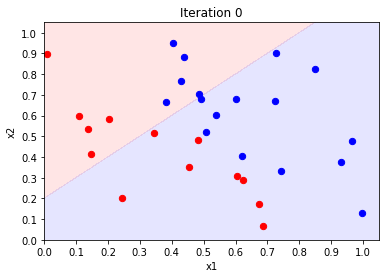


 Iteration 1 
Weights:  [-0.8, 1.950948652251427, -0.00600371579854353]
Accuracy:  0.7333333333333333


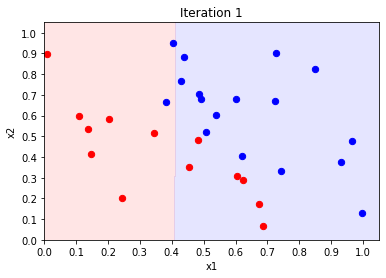


 Iteration 2 
Weights:  [-1.8, 2.8111377613847823, 0.27785680228480003]
Accuracy:  0.6333333333333333


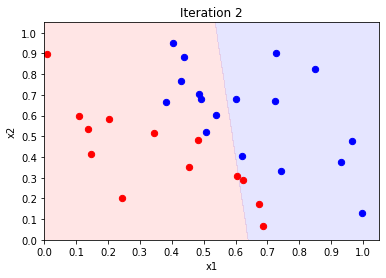


 Iteration 3 
Weights:  [-2.8, 2.7436340865459936, 1.0721179057941885]
Accuracy:  0.6


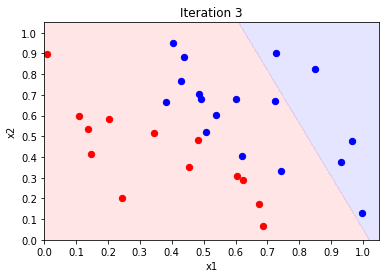


 Iteration 4 
Weights:  [-2.8, 3.3396280844493207, 1.6755164638698181]
Accuracy:  0.8333333333333334


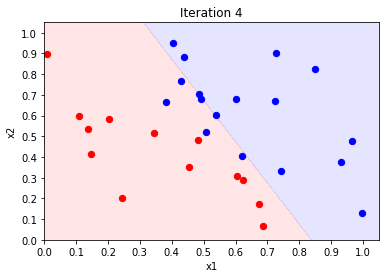


 Iteration 5 
Weights:  [-2.8, 3.5519448647080516, 2.28516158911982]
Accuracy:  0.9


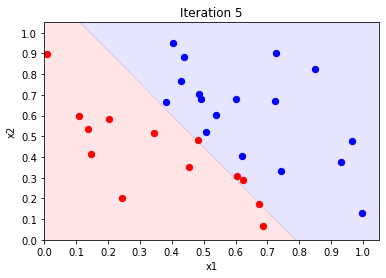


 Iteration 6 
Weights:  [-3.8, 4.016263900376646, 2.5458005060005635]
Accuracy:  0.7666666666666667


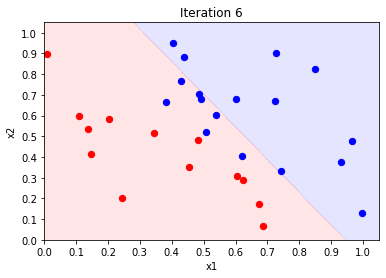


 Iteration 7 
Weights:  [-3.8, 3.9040564507274826, 3.319994374638048]
Accuracy:  0.9


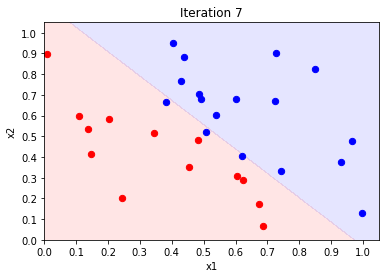


 Iteration 8 
Weights:  [-3.8, 3.737269082620219, 3.6670872121993074]
Accuracy:  0.9666666666666667


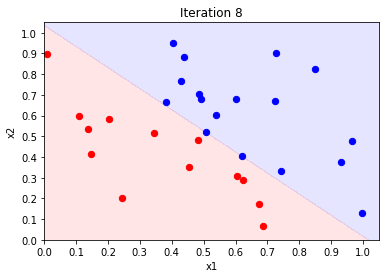


 Iteration 9 
Weights:  [-3.8, 4.135671322234642, 3.5901402485880856]
Accuracy:  1.0


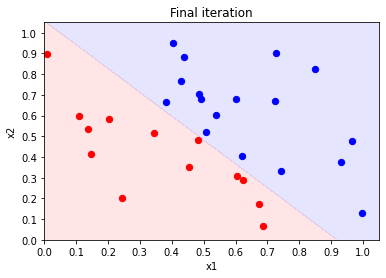

[-3.8, 4.135671322234642, 3.5901402485880856]


In [9]:
perceptron(matrix)